# Assignment 4: Playing with Frequencies

MIDS W281: Computer Vision

## Recommended Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from utils import *

## Part 1: Hybrid Images

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_4/objective1.png)

 ### Overview
 The goal of this part of the assignment is to create [hybrid images](http://olivalab.mit.edu/hybrid_gallery/gallery.html) using the approach described in the SIGGRAPH 2006 [paper](http://olivalab.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf) by Oliva, Torralba, and Schyns. Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency part of the image can be seen. By blending the high-frequency portion of one image with the low-frequency portion of another, you get a hybrid image that leads to different interpretations at different distances.

 ### Description
 You are given a sample image of [Albert Einstein](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/al.png) and [Marlyn Monroe](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/mm.png). These images are already aligned such that the eyes are at the same location in the images.

 1. Low-pass the image of Albert Einstein. For a low-pass filter, Oliva et al. suggests using a standard 2-D Gaussian filter. The size and sigma of the Gaussian filter can be decided with some experimentation. In the given example, we used a Gaussian filter of size 15 and sigma 8. **Hint: You can use create_2d_gaussian(size, std) function in utils.py to create a 2-D Gaussian filter of a given size and sigma.**  

 2. High-pass filter the image of Marlyn Monroe. For a high-pass filter, the paper suggests using the impulse filter minus the Gaussian filter. This is the same method we used to create a high-pass filter [I - I<sub>b</sub>] in Part 1 of the previous assignment. For computing [I<sub>b</sub>] in this example, we used a Gaussian filter of size 9 and sigma 1.5. You can experiment with these values.  

 3. Create a hybrid image by taking the average of the output images in the above two steps.  

### Deliverables:

- Python code creating hybrid images
- The output hybrid image.

In [3]:
# create a function that takes in an two images,
# uses the create_2d_gaussian method inside the utils script to create a 2D Gaussian filter
# then passes these filters to scipy.ndimage's convolve function
# finally, uses these blurred images to return a hybrid image

def hybrid_image(im1, im2,
                 low_filter_size=15, low_sigma=8,
                 high_filter_size=9, high_sigma=1.5):
    """
    Create a hybrid image by low-pass filtering im1 and high-pass filtering im2.

    Parameters:
    -----------
    im1 : numpy array
        Image to be low-pass filtered (e.g., Albert Einstein).
    im2 : numpy array
        Image to be high-pass filtered (e.g., Marilyn Monroe).
    low_filter_size : int
        Size of the Gaussian filter for low-pass filtering.
    low_sigma : float
        Sigma of the Gaussian filter for low-pass filtering.
    high_filter_size : int
        Size of the Gaussian filter for high-pass filtering.
    high_sigma : float
        Sigma of the Gaussian filter for high-pass filtering.

    Returns:
    --------
    hybrid : numpy array
        The resulting hybrid image, normalized between 0 and 1.
    """
    # Create the low-pass Gaussian filter using the utils function
    gauss_low = create_2d_gaussian(low_filter_size, low_sigma)
    # Create the Gaussian for the high-pass filter (to later subtract)
    gauss_high = create_2d_gaussian(high_filter_size, high_sigma)

    # Low-pass filter im1
    im1_low = convolve(im1, gauss_low, mode='reflect')

    # High-pass filter im2: subtract the blurred version from the original image
    im2_blur = convolve(im2, gauss_high, mode='reflect')
    im2_high = im2 - im2_blur

    # Combine the images by taking the average of the low-pass and high-pass images
    hybrid = (im1_low + im2_high) / 2


    # Normalize the hybrid image between 0 and 1 for display
    hybrid = normalize_img(hybrid)
    return hybrid


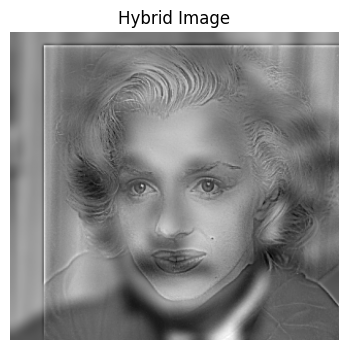

In [4]:
# load in the assignment images
imfile1 ='images/al.png'
imfile2 = 'images/mm.png'

im1 = plt.imread(imfile1) # low sf
im2 = plt.imread(imfile2) # high

# hybrid images
# TODO call hybrid_image to return a hybrid image

# TODO show and save your resultant image

# Create the hybrid image
hybrid_result = hybrid_image(im1, im2,
                             low_filter_size=15, low_sigma=8,
                             high_filter_size=9, high_sigma=1.5)

# Display the result
plt.figure(figsize=(8, 4))
plt.imshow(hybrid_result, cmap='gray')
plt.axis('off')
plt.title('Hybrid Image')
plt.show()

# Save the result
plt.imsave('einstein_monroe_hybrid.png', hybrid_result, cmap='gray')

## Part 2: Multiresolution Blending (a.k.a. the oraple!)

![Multiresolution Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_4/objective2.png)

### Overview
The goal of this part of the assignment is to blend two images seamlessly using multi-resolution blending, as described in the 1983 [paper](http://persci.mit.edu/pub_pdfs/spline83.pdf) by Burt and Adelson. In this method, blending occurs at multiple scales so that low-frequency content is blended smoothly over a wide area, and high-frequency content is blended sharply over a narrow area. This is achieved using _image stacks_, which are similar to _image pyramids_. In an image pyramid, for each level of the pyramid the image is downsampled (so that each pyramid level gets smaller and smaller). In a stack, the images for each level are progressively blurred, but not downsampled, so that each pyramid level contains fewer high frequencies but is still of the same size as the original image. Images in a stack can all be saved in one 3D matrix if the original image was grayscale.

### Description

 1. Implement a function that creates Gaussian and Laplacian stacks. To create the successive levels of the Gaussian stack, just apply the Gaussian filter at each level, but do not downsample. The first image in a Gaussian stack is the original image. Therefore, the last image in an n-level stack is an image that is blurred n-1 number of times. For a Laplacian stack, take the difference between the successive levels of the Gaussian stacks. Additonally, the last level of a n-level Laplacian stack is an image blurred n-1 number of times (i.e., the remainder low-frequency information not included in the previous levels). In this project, you must implement your own Gaussian and Laplacian stacks. Do not use the pyrDown or pyrUp functions in Python.  
 ***Hint: Compare your final output image to the provided objective output.  If it does not look correct, consider how you calculate the difference between the successive levels of the Gaussian stack to calculate your Laplacian stack (which level is subtracted from another)***

 2. Display the six levels of the Laplacian stack in a single Python plot. Use the output hybrid image from Part 1 for creating the stacks in this deliverable. Notice the first level and the last level of the Laplacian stack. The first level (high frequency) will look like Marlyn Monroe and the last level (low frequency) will look like Albert Einstein. The size and sigma of the Gaussian kernel used for blurring can be the same as in Part 1.

 3. Now write code in order to use your Gaussian and Laplacian stacks for blending two images together. For this, we have included the two sample images from the paper (of an [apple](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/apple.png) and an [orange](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/orange.png)), and a [mask](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_3/mask.png) image. First, create Laplacian stacks for the two input images (six levels is sufficient). Additionally, create a Gaussian stack for your mask. In our example, we used a Gaussian kernel of size 17 and sigma 3. Display the stacks for the two input images and the mask.

 4. Create a blended image, B, using the Laplacian stacks of the two images (image X and image Y) and the Gaussian stack of the mask. The intensity of the blended image at location (i,j) can be computed using the following formula,

     $$B(i,j)=\sum_{l=1}^{n} [GM_l(i,j) \times LX_l(i,j) + (1 - GM_l(i,j)) \times LY_l(i,j)]$$
     
     where $GM_l$, $LX_l$, and $LY_l$ are the $l$ th level of: the Gaussian stack for the mask image, the Laplacian stacks of image X, and the Laplacian stacks of image Y and $n$ is the number of levels in the stack.

 5. Finally normalize the image pixels in Image B between 0 and 1 before saving. **Hint: You can use the `normalize_img(img)` function in utils.py**


### Deliverables:

 - Python code for Gaussian and Laplacian stacks
 - Python code for image blending
 - A plot displaying the six levels of Laplacian stacks for the hybrid image
 - Plots displaying the six levels of Laplacian stacks for the two sample images
 - Plots displaying the six levels of Gaussian stacks for the mask image
 - The blended image, B


In [5]:
def visualize_stack(in_stack, title=''):
    """
    Visualize all levels of a Gaussian or Laplacian stack side by side.

    Parameters
    ----------
    in_stack : list of numpy arrays
        The stack of images (all the same shape) to be visualized.
    title : str
        Overall title for the figure.
    """
    levels = len(in_stack)
    fig, axes = plt.subplots(1, levels, figsize=(4*levels, 4))
    fig.suptitle(title, fontsize=16)

    for i in range(levels):
        axes[i].imshow(in_stack[i], cmap='gray', vmin=0, vmax=1)
        axes[i].axis('off')
        axes[i].set_title(f"Level {i}")

    plt.tight_layout()
    plt.show()

def gaussian_and_laplacian_stack(img, levels=6, gauss_size=17, gauss_sigma=3):
    """
    Create Gaussian and Laplacian stacks for a single-channel image.

    Parameters
    ----------
    img : numpy array (H x W)
        Grayscale image (float32 or float64).
    levels : int
        Number of levels in the stack.
    gauss_size : int
        Size of the Gaussian kernel.
    gauss_sigma : float
        Sigma for the Gaussian kernel.

    Returns
    -------
    gaussian_stack : list of numpy arrays
        The Gaussian stack with `levels` images (same size).
    laplacian_stack : list of numpy arrays
        The Laplacian stack with `levels` images (same size).
    """
    # Ensure float type
    img = img.astype(np.float32)

    # 1) Build Gaussian kernel once
    gauss_kernel = create_2d_gaussian(size=gauss_size, std=gauss_sigma)

    # 2) Construct Gaussian stack
    gaussian_stack = [img]  # level 0 is the original image
    for _ in range(levels - 1):
        blurred = convolve(gaussian_stack[-1], gauss_kernel, mode='reflect')
        gaussian_stack.append(blurred)

    # 3) Construct Laplacian stack
    laplacian_stack = []
    for i in range(levels - 1):
        # Difference between consecutive Gaussian levels
        lap = gaussian_stack[i] - gaussian_stack[i + 1]
        laplacian_stack.append(lap)
    # The last level is the final blurred image
    laplacian_stack.append(gaussian_stack[-1])

    # Optionally, you might want to normalize each level to [0,1] for display
    # but for the actual math, it can be fine to leave them in float range.
    # For visualization:
    # gaussian_stack = [normalize_img(g) for g in gaussian_stack]
    # laplacian_stack = [normalize_img(l) for l in laplacian_stack]

    return gaussian_stack, laplacian_stack

def collapse_laplacian_stack(laplacian_stack):
    """
    Collapse (reconstruct) an image from a Laplacian stack by summation.

    Parameters
    ----------
    laplacian_stack : list of numpy arrays
        The Laplacian stack to collapse.

    Returns
    -------
    reconstructed : numpy array
        The reconstructed single-channel image (same shape as each level).
    """
    reconstructed = np.zeros_like(laplacian_stack[0])
    for lvl in laplacian_stack:
        reconstructed += lvl
    return reconstructed
def create_blended_stack(laplacian_stack1, laplacian_stack2, gaussian_mask_stack):
    """
    Blend two Laplacian stacks using a Gaussian mask stack.

    Parameters
    ----------
    laplacian_stack1 : list of numpy arrays
        Laplacian stack of image 1.
    laplacian_stack2 : list of numpy arrays
        Laplacian stack of image 2.
    gaussian_mask_stack : list of numpy arrays
        Gaussian stack of the mask (same size/levels as the Laplacian stacks).

    Returns
    -------
    blended_stack : list of numpy arrays
        Laplacian-like stack of blended images, one per level.
    """
    blended_stack = []
    num_levels = len(laplacian_stack1)
    for l in range(num_levels):
        # Weighted combination for each level
        gm = gaussian_mask_stack[l]
        ls1 = laplacian_stack1[l]
        ls2 = laplacian_stack2[l]

        # B_l = GM_l * LX_l + (1 - GM_l) * LY_l
        blended_level = gm * ls1 + (1.0 - gm) * ls2
        blended_stack.append(blended_level)

    return blended_stack
def multires_blending(img1, img2, mask, levels=6, gauss_size=17, gauss_sigma=3):
    """
    Perform multi-resolution blending of two images given a mask.

    Parameters
    ----------
    img1 : numpy array (H x W)
        Grayscale image 1.
    img2 : numpy array (H x W)
        Grayscale image 2.
    mask : numpy array (H x W)
        Grayscale mask (values in [0,1] ideally).
    levels : int
        Number of stack levels to use.
    gauss_size : int
        Size of Gaussian kernel for building the stacks.
    gauss_sigma : float
        Sigma of the Gaussian kernel for building the stacks.

    Returns
    -------
    blended : numpy array (H x W)
        The final blended image, normalized to [0,1].
    """
    # Build stacks for image1, image2, and mask
    g1, l1 = gaussian_and_laplacian_stack(img1, levels, gauss_size, gauss_sigma)
    g2, l2 = gaussian_and_laplacian_stack(img2, levels, gauss_size, gauss_sigma)
    gm, _  = gaussian_and_laplacian_stack(mask, levels, gauss_size, gauss_sigma)

    # Blend the Laplacian stacks using the Gaussian mask stack
    blended_stack = create_blended_stack(l1, l2, gm)

    # Collapse the blended stack
    blended_img = collapse_laplacian_stack(blended_stack)

    # Normalize to [0,1] for display or saving
    blended_img = normalize_img(blended_img)
    return blended_img


### Deliverables

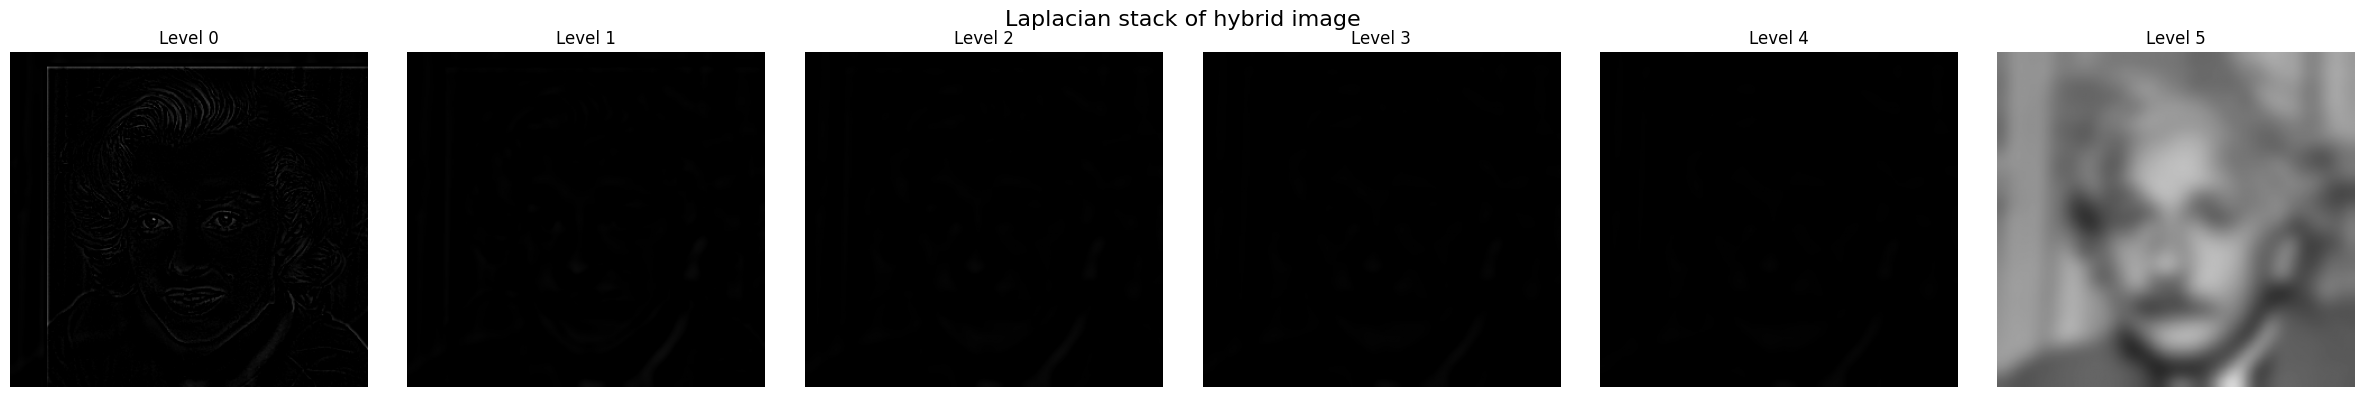

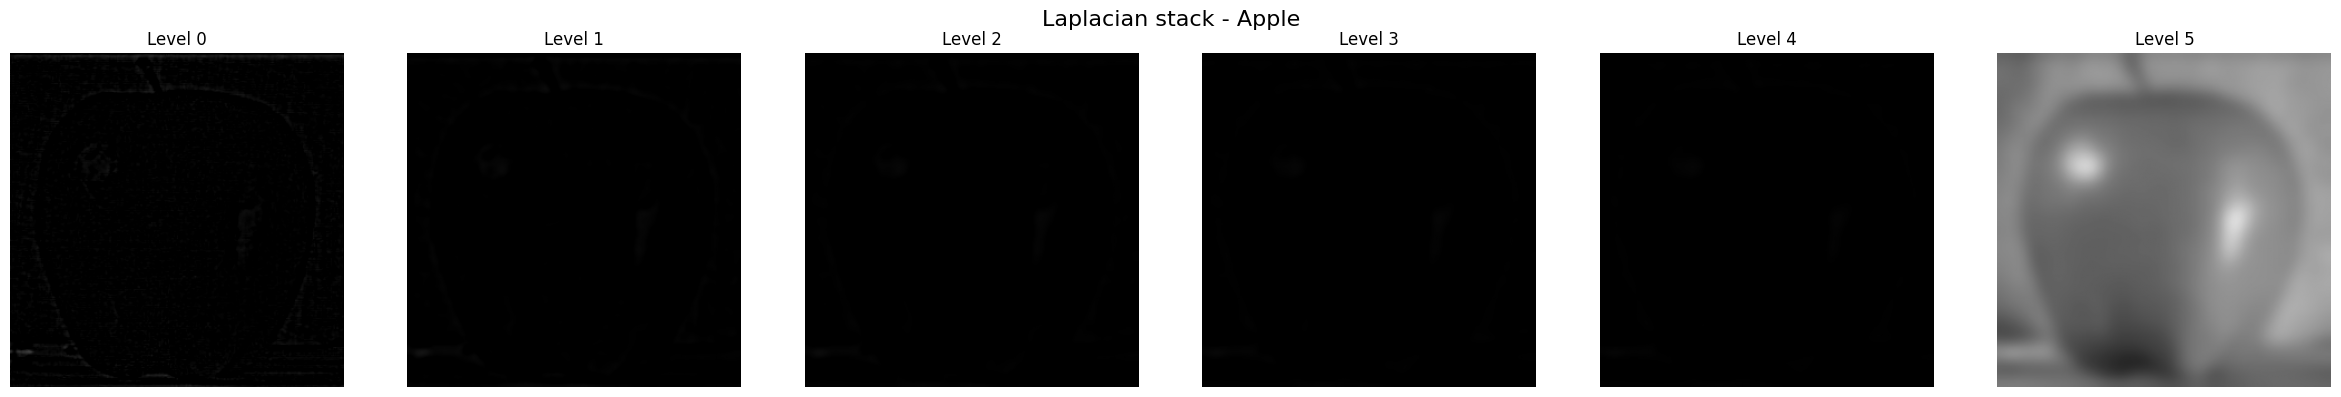

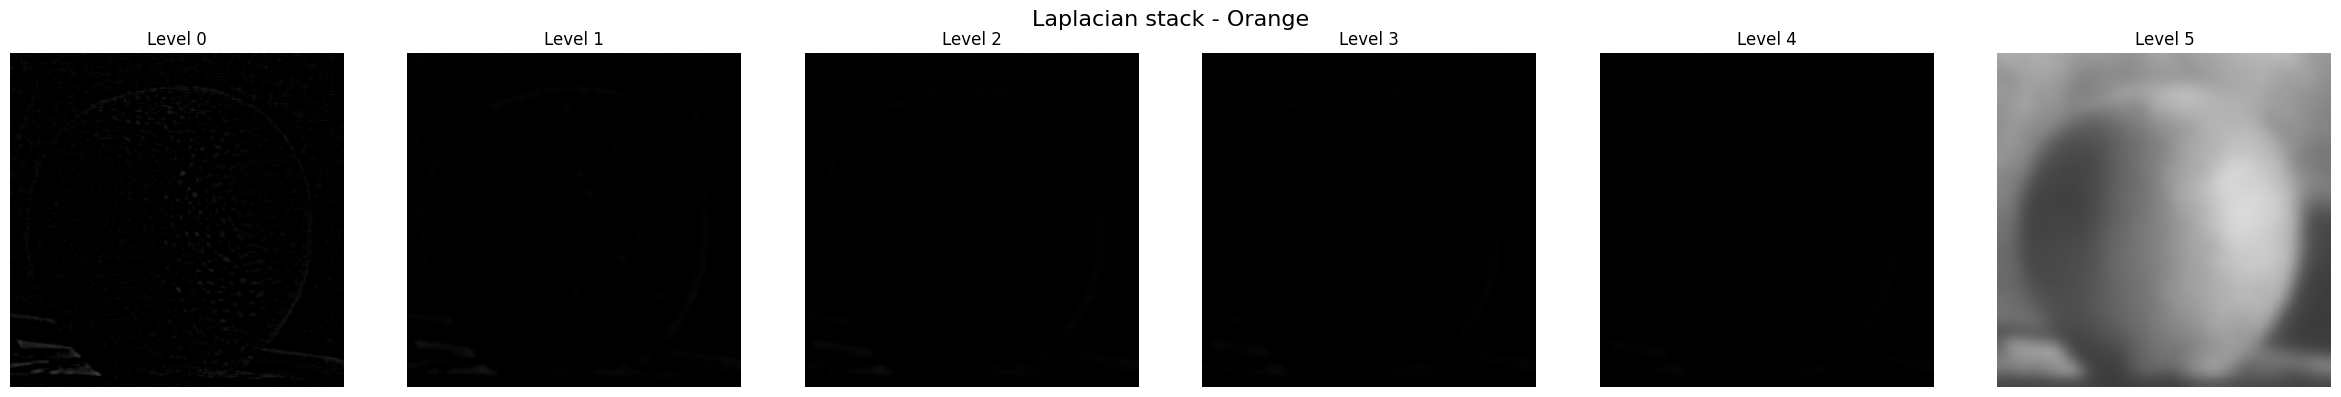

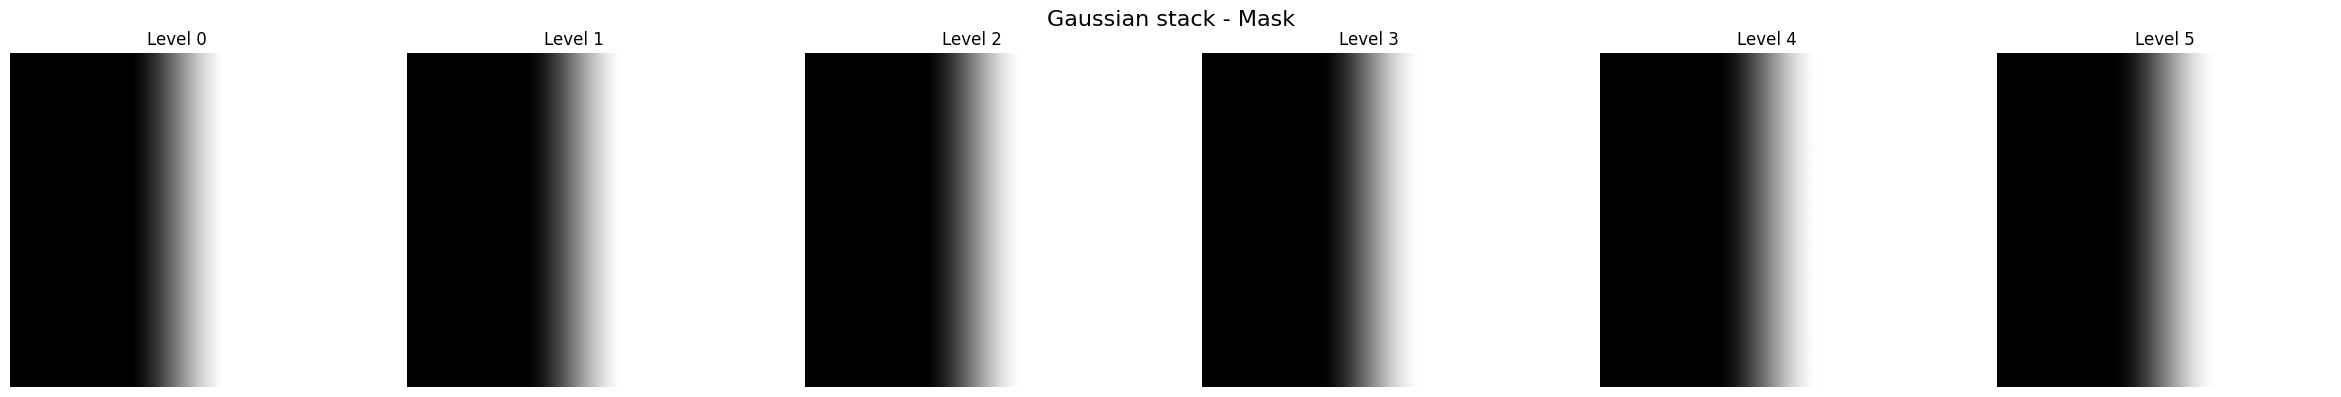

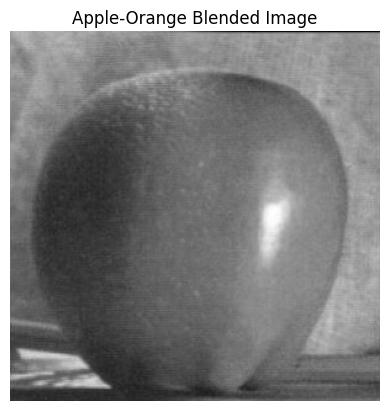

In [6]:
img1 = plt.imread("images/apple.png").astype(np.float32)
img2 = plt.imread("images/orange.png").astype(np.float32)
mask = plt.imread("images/mask.png").astype(np.float32)

# Build and visualize the hybrid stacks for demonstration (Part 1)
gs_h, ls_h = gaussian_and_laplacian_stack(hybrid_result, 6)
visualize_stack(ls_h, title='Laplacian stack of hybrid image')

# For the apple/orange blending:
gs_a, ls_a = gaussian_and_laplacian_stack(img1, 6)
gs_o, ls_o = gaussian_and_laplacian_stack(img2, 6)
gs_m, _    = gaussian_and_laplacian_stack(mask, 6)

# Visualize the Laplacian stacks and mask Gaussian stack
visualize_stack(ls_a, title='Laplacian stack - Apple')
visualize_stack(ls_o, title='Laplacian stack - Orange')
visualize_stack(gs_m, title='Gaussian stack - Mask')

# Perform multi-resolution blending
blended = multires_blending(img1, img2, mask,
                            levels=6, gauss_size=17, gauss_sigma=3)

# Save or display the final blended result
plt.imsave("out_oraple.png", blended, cmap='gray', vmin=0, vmax=1)
plt.imshow(blended, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Apple-Orange Blended Image")
plt.show()


## Acknowledgments
This assignment is inspired from Image Manipulation, Computer Vision and Computational Photography course at EECS UC Berkeley.